In this notebook, I predict the price of rent house using Artificial Neural Network for regression
In this notebook, I put all independet variables to the equation of regression to see how accurate the prediction by doing so, but I will make different version of prediction still using ANN in different notebook by putting selected independent variables whose high correlation to Price variable to analyze the accuracy of prediction.

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from tensorflow import keras
from sklearn.metrics import mean_squared_error

In [67]:
data_train=pd.read_csv('House_Rent_Dataset.csv')
data_train.tail()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent
4745,2022-05-04,2,15000,1000,4 out of 5,Carpet Area,Suchitra Circle,Hyderabad,Unfurnished,Bachelors,2,Contact Owner


In [68]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [69]:
data_train['Area Type']=label_encoder.fit_transform(data_train['Area Type'])
data_train['Area Locality']=label_encoder.fit_transform(data_train['Area Locality'])
data_train['City']=label_encoder.fit_transform(data_train['City'])
data_train['Furnishing Status']=label_encoder.fit_transform(data_train['Furnishing Status'])
data_train['Tenant Preferred']=label_encoder.fit_transform(data_train['Tenant Preferred'])
data_train['Bathroom']=label_encoder.fit_transform(data_train['Bathroom'])
data_train['Point of Contact']=label_encoder.fit_transform(data_train['Point of Contact'])

In [70]:
data_train.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,2,221,4,2,1,1,2
1,2022-05-13,2,20000,800,1 out of 3,2,1527,4,1,1,0,2
2,2022-05-16,2,17000,1000,1 out of 3,2,1760,4,1,1,0,2
3,2022-07-04,2,10000,800,1 out of 2,2,526,4,2,1,0,2
4,2022-05-09,2,7500,850,1 out of 2,1,1890,4,2,0,0,2


In [71]:
data_train=pd.get_dummies(data_train)

In [72]:
data_train

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,...,Floor_Upper Basement out of 2,Floor_Upper Basement out of 20,Floor_Upper Basement out of 22,Floor_Upper Basement out of 3,Floor_Upper Basement out of 30,Floor_Upper Basement out of 4,Floor_Upper Basement out of 40,Floor_Upper Basement out of 5,Floor_Upper Basement out of 7,Floor_Upper Basement out of 9
0,2,10000,1100,2,221,4,2,1,1,2,...,0,0,0,0,0,0,0,0,0,0
1,2,20000,800,2,1527,4,1,1,0,2,...,0,0,0,0,0,0,0,0,0,0
2,2,17000,1000,2,1760,4,1,1,0,2,...,0,0,0,0,0,0,0,0,0,0
3,2,10000,800,2,526,4,2,1,0,2,...,0,0,0,0,0,0,0,0,0,0
4,2,7500,850,1,1890,4,2,0,0,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,1,219,3,1,1,1,2,...,0,0,0,0,0,0,0,0,0,0
4742,3,29000,2000,2,1214,3,1,1,2,2,...,0,0,0,0,0,0,0,0,0,0
4743,3,35000,1750,1,724,3,1,1,2,0,...,0,0,0,0,0,0,0,0,0,0
4744,3,45000,1500,1,590,3,1,2,1,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
X=data_train.iloc[:, 2:571].values
y=data_train.iloc[:, [1]].values

X

array([[1100,    2,  221, ...,    0,    0,    0],
       [ 800,    2, 1527, ...,    0,    0,    0],
       [1000,    2, 1760, ...,    0,    0,    0],
       ...,
       [1750,    1,  724, ...,    0,    0,    0],
       [1500,    1,  590, ...,    0,    0,    0],
       [1000,    1, 1915, ...,    0,    0,    0]], dtype=int64)

In [74]:
ann = keras.models.Sequential() #Generating ANN

In [75]:
ann.add(keras.layers.Dense(units=4, activation='relu')) #first hidden layer

In [76]:
ann.add(keras.layers.Dense(units=6, activation='relu'))# Second hidden layer 

In [86]:
ann.add(keras.layers.Dense(units=6, activation='relu')) #Third hidden Layer

In [87]:
ann.add(keras.layers.Dense(units=1)) #output layer (house rent price)

In [88]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['MeanSquaredLogarithmicError'])

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.2, shuffle=True)

In [100]:
model = ann.fit(X_train, y_train, batch_size = 32, epochs = 75,validation_data=(X_val, y_val),
              shuffle=True)

Epoch 1/75
95/95 [==============================] - 0s 4ms/step - loss: 4930105344.0000 - mean_squared_logarithmic_error: 5.0885 - val_loss: 19299956736.0000 - val_mean_squared_logarithmic_error: 5.0131
Epoch 2/75
95/95 [==============================] - 0s 3ms/step - loss: 4925228032.0000 - mean_squared_logarithmic_error: 4.9659 - val_loss: 19294732288.0000 - val_mean_squared_logarithmic_error: 4.8942
Epoch 3/75
95/95 [==============================] - 0s 3ms/step - loss: 4920283648.0000 - mean_squared_logarithmic_error: 4.8473 - val_loss: 19289290752.0000 - val_mean_squared_logarithmic_error: 4.7756
Epoch 4/75
95/95 [==============================] - 0s 3ms/step - loss: 4915265024.0000 - mean_squared_logarithmic_error: 4.7303 - val_loss: 19283834880.0000 - val_mean_squared_logarithmic_error: 4.6614
Epoch 5/75
95/95 [==============================] - 0s 2ms/step - loss: 4910184960.0000 - mean_squared_logarithmic_error: 4.6181 - val_loss: 19278290944.0000 - val_mean_squared_logarithmic

95/95 [==============================] - 0s 3ms/step - loss: 4683761664.0000 - mean_squared_logarithmic_error: 2.0367 - val_loss: 19031683072.0000 - val_mean_squared_logarithmic_error: 2.0179
Epoch 42/75
95/95 [==============================] - 0s 3ms/step - loss: 4676429312.0000 - mean_squared_logarithmic_error: 1.9939 - val_loss: 19023706112.0000 - val_mean_squared_logarithmic_error: 1.9767
Epoch 43/75
95/95 [==============================] - 0s 3ms/step - loss: 4669082624.0000 - mean_squared_logarithmic_error: 1.9525 - val_loss: 19015587840.0000 - val_mean_squared_logarithmic_error: 1.9362
Epoch 44/75
95/95 [==============================] - 0s 3ms/step - loss: 4661685760.0000 - mean_squared_logarithmic_error: 1.9129 - val_loss: 19007508480.0000 - val_mean_squared_logarithmic_error: 1.8972
Epoch 45/75
95/95 [==============================] - 0s 3ms/step - loss: 4654243840.0000 - mean_squared_logarithmic_error: 1.8746 - val_loss: 18999439360.0000 - val_mean_squared_logarithmic_error:

In [101]:
#Let's Predict the result
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 11974.01  60000.  ]
 [ 11974.01   6000.  ]
 [ 11974.01  12000.  ]
 ...
 [ 11974.01  21000.  ]
 [ 11974.01 850000.  ]
 [ 11974.01   7000.  ]]


In [102]:
# I use several metrics of regression model
import sklearn.metrics
evs_no=sklearn.metrics.explained_variance_score(y_test,ann.predict(X_test))
me_no=sklearn.metrics.max_error(y_test,ann.predict(X_test))
mae_no=sklearn.metrics.mean_absolute_error(y_test,ann.predict(X_test))
mse_no=sklearn.metrics.mean_squared_error(y_test,ann.predict(X_test))
msle_no=sklearn.metrics.mean_squared_log_error(y_test,ann.predict(X_test))
Mae_no=sklearn.metrics.median_absolute_error(y_test,ann.predict(X_test))
r2_no=sklearn.metrics.r2_score(y_test,ann.predict(X_test))
mpd_no=sklearn.metrics.mean_poisson_deviance(y_test,ann.predict(X_test))
mgd_no=sklearn.metrics.mean_gamma_deviance(y_test,ann.predict(X_test))
mtd_no=sklearn.metrics.mean_tweedie_deviance(y_test,ann.predict(X_test))

In [103]:
print('Explained Variance Score:',evs_no)
print('Max Error               :',me_no)
print('Mean Absolute Error     :',mae_no)
print('Mean Square Error       :',mse_no)
print('Mean Squared Log Error  :',msle_no)
print('Median Absolute Error   :',Mae_no)
print('R2 Score                :',r2_no)
print('Mean Poisson Deviance   :',mpd_no)
print('Mean Gamma Deviance     :',mgd_no)
print('Mean Tweedie Deviance   :',mtd_no)

Explained Variance Score: 0.0
Max Error               : 838025.994140625
Mean Absolute Error     : 25531.64830592105
Mean Square Error       : 4020462388.8374844
Mean Squared Log Error  : 1.1377801239794054
Median Absolute Error   : 5974.005859375
R2 Score                : -0.15340348548405314
Mean Poisson Deviance   : 77441.94653303827
Mean Gamma Deviance     : 2.8713397847414917
Mean Tweedie Deviance   : 4020462388.8374844


dict_keys(['loss', 'mean_squared_logarithmic_error', 'val_loss', 'val_mean_squared_logarithmic_error'])


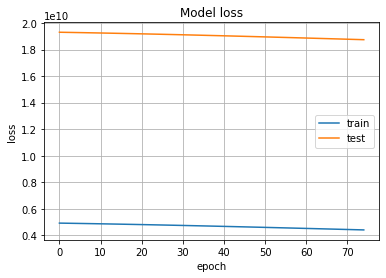

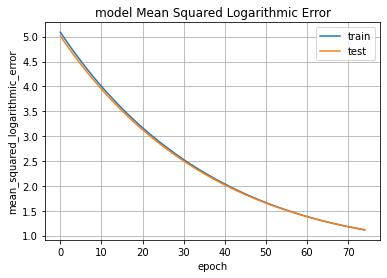

In [104]:
# list all data in history
print(model.history.keys())
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.grid()
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
# summarize history for loss
plt.plot(model.history['mean_squared_logarithmic_error'])
plt.plot(model.history['val_mean_squared_logarithmic_error'])
plt.grid()
plt.title('model Mean Squared Logarithmic Error')
plt.ylabel('mean_squared_logarithmic_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
